In [1]:
!pip install chart_studio

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
%matplotlib inline

# Preprocessing
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import datetime as dt
from datetime import datetime   

# Visualisation libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()


import os
for dirname, _, filenames in os.walk('../input/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

../input/Dataset\aaaaaaa.csv
../input/Dataset\example_test_audio_metadata.csv
../input/Dataset\example_test_audio_summary.csv
../input/Dataset\sample_submission.csv
../input/Dataset\test.csv
../input/Dataset\train.csv
../input/Dataset\example_test_audio\BLKFR-10-CPL_20190611_093000.pt540.mp3
../input/Dataset\example_test_audio\ORANGE-7-CAP_20190606_093000.pt623.mp3
../input/Dataset\train_audio\aldfly\XC134874.mp3
../input/Dataset\train_audio\aldfly\XC135454.mp3
../input/Dataset\train_audio\aldfly\XC135455.mp3
../input/Dataset\train_audio\aldfly\XC135456.mp3
../input/Dataset\train_audio\aldfly\XC135457.mp3
../input/Dataset\train_audio\aldfly\XC135459.mp3
../input/Dataset\train_audio\aldfly\XC135460.mp3
../input/Dataset\train_audio\aldfly\XC135883.mp3
../input/Dataset\train_audio\aldfly\XC137570.mp3
../input/Dataset\train_audio\aldfly\XC138639.mp3
../input/Dataset\train_audio\aldfly\XC139577.mp3
../input/Dataset\train_audio\aldfly\XC140298.mp3
../input/Dataset\train_audio\aldfly\XC142065

In [5]:
train = pd.read_csv('../input/Dataset/train.csv')
train.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21375 entries, 0 to 21374
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            21375 non-null  float64
 1   playback_used     19575 non-null  object 
 2   ebird_code        21375 non-null  object 
 3   channels          21375 non-null  object 
 4   date              21375 non-null  object 
 5   pitch             21375 non-null  object 
 6   duration          21375 non-null  int64  
 7   filename          21375 non-null  object 
 8   speed             21375 non-null  object 
 9   species           21375 non-null  object 
 10  number_of_notes   21375 non-null  object 
 11  title             21375 non-null  object 
 12  secondary_labels  21375 non-null  object 
 13  bird_seen         19575 non-null  object 
 14  sci_name          21375 non-null  object 
 15  location          21375 non-null  object 
 16  latitude          21375 non-null  object

In [7]:
len(train['ebird_code'].value_counts())

264

In [8]:
x = train['ebird_code'].value_counts().index.to_list()
e_code_path = 'https://ebird.org/species/'
species = [e_code_path+p for p in x]

In [9]:
from IPython.display import IFrame
IFrame(species[0], width=800, height=450)

In [10]:
IFrame(species[100], width=800, height=450)

In [11]:
train['recordist'].value_counts()[:10].sort_values().iplot(kind='barh',color='#3780BF')

In [12]:
train['playback_used'].fillna('Not Defined',inplace=True);
train['playback_used'].value_counts()

playback_used
no             18964
Not Defined     1800
yes              611
Name: count, dtype: int64

In [13]:
train['playback_used'].value_counts()

labels = train['playback_used'].value_counts().index
values = train['playback_used'].value_counts().values
colors=['#3795bf','#bfbfbf']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',marker=dict(colors=colors))])
fig.show()

In [14]:
train['rating'].value_counts().iplot(kind='bar',color='#3780BF')

<Axes: xlabel='date'>

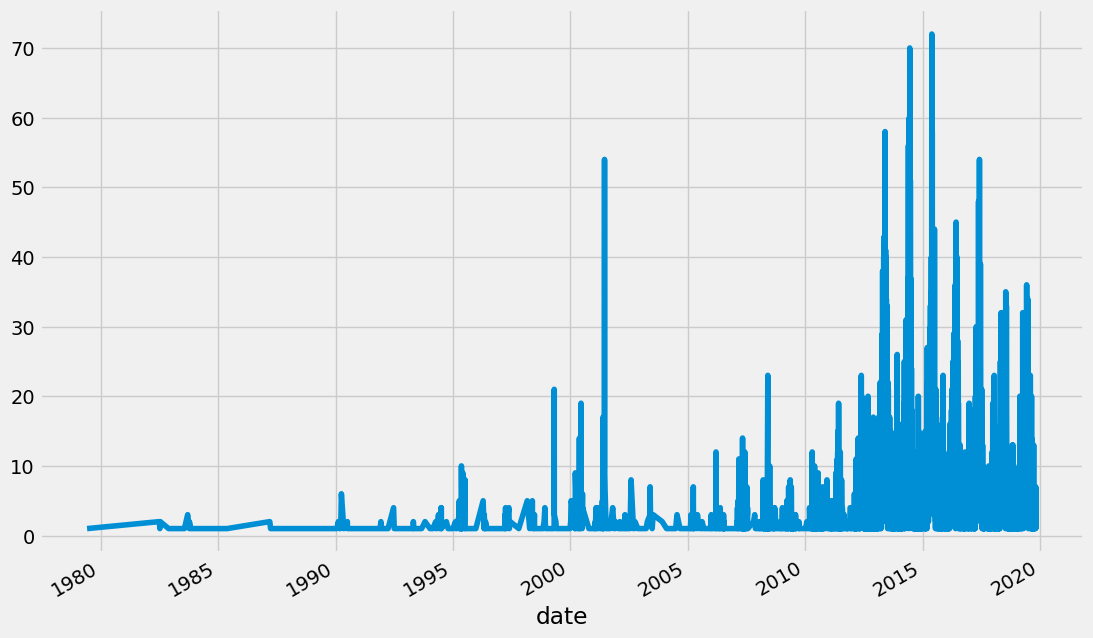

In [15]:
# Convert string to datetime64
train['date'] = train['date'].apply(pd.to_datetime,format='%Y-%m-%d', errors='coerce')
#train.set_index('date',inplace=True)
train['date'].value_counts().plot(figsize=(12,8))

In [17]:
%%HTML
<div class='tableauPlaceholder' id='viz1592397692077' style='position: relative'>
  <noscript>
    <a href='#'>
      <img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bi&#47;Birds_15923974075490&#47;Dashboard1&#47;1_rss.png' style='border: none' />
    </a>
  </noscript>
  <object class='tableauViz'  style='display:none;'>
    <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
    <param name='embed_code_version' value='3' />
    <param name='site_root' value='' />
    <param name='name' value='Birds_15923974075490&#47;Dashboard1' />
    <param name='tabs' value='no' />
    <param name='toolbar' value='yes' />
    <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bi&#47;Birds_15923974075490&#47;Dashboard1&#47;1.png' />
    <param name='animate_transition' value='yes' />
    <param name='display_static_image' value='yes' />
    <param name='display_spinner' value='yes' />
    <param name='display_overlay' value='yes' />
    <param name='display_count' value='yes' />
    <param name='language' value='en' />
    <param name='filter' value='publish=yes' />
  </object>
</div>
<script type='text/javascript'>
  var divElement = document.getElementById('viz1592397692077');
  var vizElement = divElement.getElementsByTagName('object')[0];
  if ( divElement.offsetWidth > 800 ) {
    vizElement.style.minWidth='420px';
    vizElement.style.maxWidth='650px';
    vizElement.style.width='100%';
    vizElement.style.minHeight='587px';
    vizElement.style.maxHeight='887px';
    vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
  } else if ( divElement.offsetWidth > 500 ) {
    vizElement.style.minWidth='420px';
    vizElement.style.maxWidth='650px';
    vizElement.style.width='100%';
    vizElement.style.minHeight='587px';
    vizElement.style.maxHeight='887px';
    vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
  } else {
    vizElement.style.width='100%';
    vizElement.style.height='727px';
  }
  var scriptElement = document.createElement('script');
  scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
  vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>


In [18]:
# Total no of unique species in the dataset
print(len(train['species'].value_counts().index))

264


In [19]:
train['species'].value_counts()

species
Alder Flycatcher        100
Pied-billed Grebe       100
Northern Waterthrush    100
Field Sparrow           100
Evening Grosbeak        100
                       ... 
LeConte's Thrasher       20
Costa's Hummingbird      19
Hooded Merganser         19
Bufflehead               15
Redhead                   9
Name: count, Length: 264, dtype: int64

In [20]:
train['species'].value_counts().iplot()

In [21]:
%%HTML
<div class='tableauPlaceholder' id='viz1592442148007' style='position: relative'>
  <noscript>
    <a href='#'>
      <img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ZN&#47;ZNDRZCHNN&#47;1_rss.png' style='border: none' />
    </a>
  </noscript>
  <object class='tableauViz'  style='display:none;'>
    <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
    <param name='embed_code_version' value='3' />
    <param name='path' value='shared&#47;ZNDRZCHNN' />
    <param name='toolbar' value='yes' />
    <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ZN&#47;ZNDRZCHNN&#47;1.png' />
    <param name='animate_transition' value='yes' />
    <param name='display_static_image' value='yes' />
    <param name='display_spinner' value='yes' />
    <param name='display_overlay' value='yes' />
    <param name='display_count' value='yes' />
    <param name='language' value='en' />
    <param name='filter' value='publish=yes' />
  </object>
</div>
<script type='text/javascript'>
  var divElement = document.getElementById('viz1592442148007');
  var vizElement = divElement.getElementsByTagName('object')[0];
  if ( divElement.offsetWidth > 800 ) {
    vizElement.style.minWidth='420px';
    vizElement.style.maxWidth='650px';
    vizElement.style.width='100%';
    vizElement.style.minHeight='587px';
    vizElement.style.maxHeight='887px';
    vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
  } else if ( divElement.offsetWidth > 500 ) {
    vizElement.style.minWidth='420px';
    vizElement.style.maxWidth='650px';
    vizElement.style.width='100%';
    vizElement.style.minHeight='587px';
    vizElement.style.maxHeight='887px';
    vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
  } else {
    vizElement.style.width='100%';
    vizElement.style.height='727px';
  }
  var scriptElement = document.createElement('script');
  scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
  vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>


In [22]:
audio_path = './Data/train_audio/nutwoo/XC462016.mp3'
x , sr = librosa.load(audio_path)

In [25]:
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(1800000,) 22050


In [28]:
# resample the audio sample to 44.1KHz
librosa.load(audio_path, sr=44100)

(array([ 0.0000000e+00, -1.5355328e-11, -9.4725252e-12, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 44100)

In [27]:
# load audio without resampling
librosa.load(audio_path, sr=None)

(array([ 0.0000000e+00, -1.5355328e-11, -9.4725252e-12, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 44100)

In [29]:
import IPython.display as ipd
ipd.Audio(audio_path)

In [32]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

AttributeError: module 'librosa.display' has no attribute 'waveplot'

<Figure size 1400x500 with 0 Axes>